In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_excel("students_performance.xlsx")
data.head()

,age,absences,study_hours,exam_score,result
0,21,4,4.2,13.4,Pass
1,24,2,2.1,8.9,Fail
2,23,10,1.2,6.2,Fail
3,21,2,1.7,9.0,Fail
4,24,2,0.9,5.5,Fail


In [2]:
data.describe()
data['result'].value_counts()

result
Pass    71
Fail    49
Name: count, dtype: int64

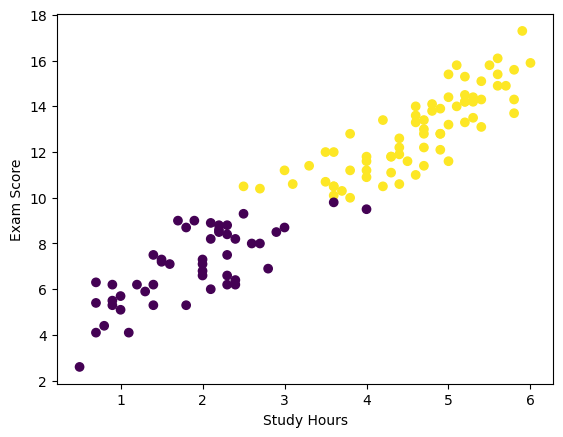

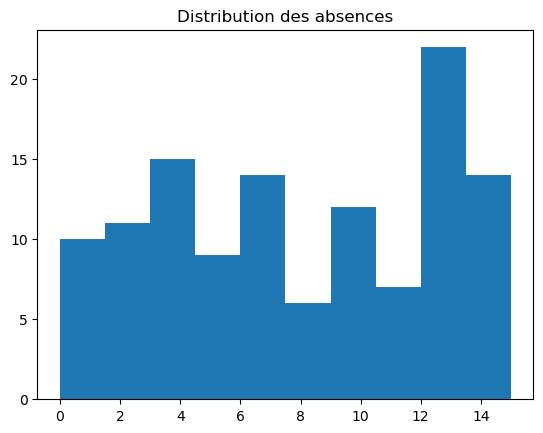

In [3]:
plt.scatter(data['study_hours'], data['exam_score'], c=(data['result']=='Pass'))
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.show()
plt.hist(data['absences'])
plt.title('Distribution des absences')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

X = data[['age', 'absences', 'study_hours']]
y = data['exam_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression() 
model.fit(X_train, y_train)  

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("R²:", r2)
print("MAE:", mae)

R²: 0.9768331206890344
MAE: 0.4908828260443996


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

X_clf = data[['age', 'absences', 'study_hours']]
y_clf = data['result']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

clf = LogisticRegression()  
clf.fit(X_train_c, y_train_c)  

y_pred_c = clf.predict(X_test_c)

acc = accuracy_score(y_test_c, y_pred_c)
cm = confusion_matrix(y_test_c, y_pred_c)
print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)

Accuracy: 0.9166666666666666
Confusion Matrix:
 [[ 8  2]
 [ 0 14]]


In [6]:
new_student = pd.DataFrame({
    'age': [21],
    'absences': [1],
    'study_hours': [3]
})

# Regression
pred_score = model.predict(new_student)

# Classification
pred_result = clf.predict(new_student)

print("Predicted exam score:", pred_score)
print("Predicted result:", pred_result)

Predicted exam score: [10.86056285]
Predicted result: ['Pass']


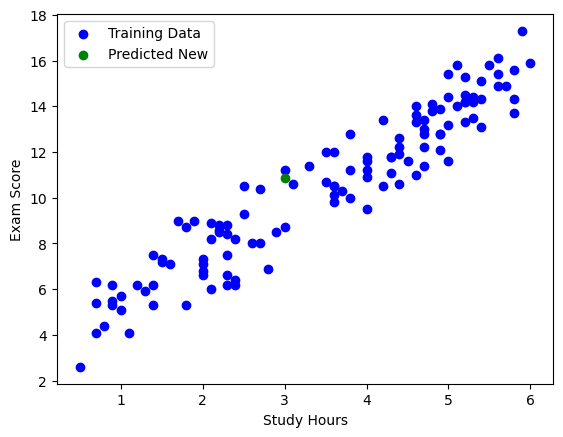

In [7]:
plt.scatter(X['study_hours'], y, color='blue', label='Training Data')
plt.scatter(new_student['study_hours'], pred_score, color='green', label='Predicted New')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.legend()
plt.show()